# CONTENTS:

## 1. Importing libraries and data

## 2. Data Cleaning (column names, missings, duplicates, mean/median/max)

## 3. Removing unnecessary and categorical variables

## 4. The elbow technique

## 5. k-means clustering

## 6. Calculating descriptive statistics on the clusters

## 7. Copying 'Cluster' and 'Clusters' form 'core_met_NOstates' into 'core_met'

## 8. Creating categories of 'Median Sq Ft'

## 9. Creating 'Share Increased' column

## 10. Exporting 'Core_Metrics_Clean_Clusters'

___________________________________________

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Making charts displayed in the notebook without calling:

%matplotlib inline

In [3]:
# Importing 'Core_Metrics_Clean_Renamed_0missing.csv':

path = r'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design'

core_met = pd.read_csv(os.path.join(path, 'Core_Metrics_Clean_Renamed_0missing.csv'))

In [4]:
# Checking the columns names:

core_met.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio
4024,4024,4024,4024,201607,Nevada,NV,295000,12829,60,5868,1192,6536,8811.0,142,2018,513292,21569,0.6868
4025,4025,4025,4025,201607,Vermont,VT,249000,7879,124,1448,28,1076,862.0,134,1902,358910,8737,0.1094
4026,4026,4026,4026,201607,Missouri,MO,159900,30204,75,10796,376,7468,8598.0,93,1730,234519,38793,0.2847
4027,4027,4027,4027,201607,Alabama,AL,185895,30474,89,8208,368,6132,1857.0,92,1977,250731,32350,0.0609
4028,4028,4028,4028,201607,North Carolina,NC,249000,61328,85,18456,1144,14052,16021.0,119,2101,347202,77136,0.2612


In [5]:
# Checking the shape of data set:

core_met.shape

(4029, 18)

In [6]:
# Checking for missing values:

core_met.isnull().sum()

Unnamed: 0.2             0
Unnamed: 0.1             0
Unnamed: 0               0
Date                     0
State                    0
State ID                 0
Median Listing Price     0
No. Active Listings      0
Median Days on Market    0
No. New Listings         0
No. Increased Price      0
No. Reduced Price        0
No. Pending Listings     0
Median Sq Ft Price       0
Median Sq Feet           0
Avg Listing Price        0
No. Total Listings       0
Pending Ratio            0
dtype: int64

#### Comments:

The missing values have been taken care of by inputing medians in the previous notebook. Hence, no missing values detected.

_________________________________

In [7]:
# Checking for duplicates:

dups = core_met.duplicated()

dups.shape

(4029,)

#### Comments:

No duplicates detected.

________________________________________

In [8]:
# Checking for the mean, median and max for 'Median Days on Market':

core_met.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4.029000e+03,4029.000000,4029.000000
mean,2014.000000,2014.000000,2014.000000,201934.506329,329270.414495,18508.470588,66.771655,9216.822537,680.451229,5172.678084,8755.870936,177.662199,1917.174733,5.208566e+05,27158.082899,0.574109
std,1163.216446,1163.216446,1163.216446,191.744709,131874.870903,22132.769445,24.879910,10212.403640,1177.772077,7391.935430,11372.359542,96.455532,239.214103,2.822897e+05,31640.794105,0.504562
min,0.000000,0.000000,0.000000,201607.000000,129913.000000,727.000000,14.000000,296.000000,0.000000,72.000000,0.000000,79.000000,988.000000,2.062990e+05,793.000000,0.000000
25%,1007.000000,1007.000000,1007.000000,201802.000000,233900.000000,5177.000000,49.000000,2292.000000,90.000000,1004.000000,1788.000000,119.000000,1782.000000,3.176900e+05,7816.000000,0.206400
50%,2014.000000,2014.000000,2014.000000,201910.000000,295000.000000,11099.000000,64.000000,5916.000000,268.000000,2760.000000,4789.000000,150.000000,1927.000000,4.191360e+05,17387.000000,0.406800
75%,3021.000000,3021.000000,3021.000000,202106.000000,387200.000000,22086.000000,81.000000,11882.000000,702.000000,6132.000000,10904.000000,195.000000,2049.000000,6.231550e+05,33165.000000,0.787000
max,4028.000000,4028.000000,4028.000000,202301.000000,880000.000000,155274.000000,211.000000,56416.000000,9460.000000,56908.000000,82101.000000,697.000000,2798.000000,1.719561e+06,208019.000000,3.132000


## 3. Removing unnecessary and categorical variables

In [9]:
# Removing unnecessary and categorical variables: 

core_met = core_met.drop(columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
core_met_NOstates = core_met.drop(columns = ['Date', 'State', 'State ID'])

In [10]:
core_met_NOstates.head()

,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio
0,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613
1,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875
2,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387
3,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575
4,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576


## 4. The elbow technique

In [11]:
# Defining the range of potential clusters in the data:

num_cl = range(1, 10)

In [12]:
# Defining k_means clusters in the range assigned above:

kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [13]:
# Creating a score that represents a rate of variation for the given cluster option:

score = [kmeans[i].fit(core_met_NOstates).score(core_met_NOstates) for i in range(len(kmeans))]

score

[-398204725021231.94,
 -126141284074966.53,
 -67660793665354.94,
 -45772548722723.66,
 -34763211086162.484,
 -27329465504584.11,
 -24222309047417.555,
 -21519760451096.434,
 -19369275947066.465]

<function matplotlib.pyplot.show(close=None, block=None)>

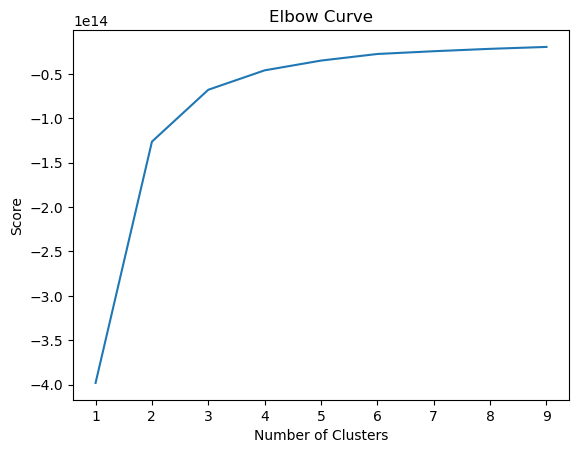

In [14]:
# Plotting the elbow curve using PyLab:

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show

#### Comments:

There is still quite some jump between 2 and 3 clusters. The jump between 3 and 4 is quite mild. After 4 the curve pretty much straightens. The colnclusion: the optimum number of clusters is 3 for this data set.

________________________________

## 5. k-means clustering

In [15]:
# Creating the k-means object:

kmeans = KMeans(n_clusters = 3)

In [16]:
# Fitting the k-means object to the data:

kmeans.fit(core_met_NOstates)

KMeans(n_clusters=3)

In [17]:
# Creating a cloumn containing the cluster values:

core_met_NOstates['Clusters'] = kmeans.fit_predict(core_met_NOstates)

core_met_NOstates.head()

,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio,Clusters
0,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613,1
1,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875,2
2,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387,2
3,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575,2
4,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576,2


In [18]:
# Checking for number of observations in each cluster:

core_met_NOstates['Clusters'].value_counts()

2    2305
0    1184
1     540
Name: Clusters, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

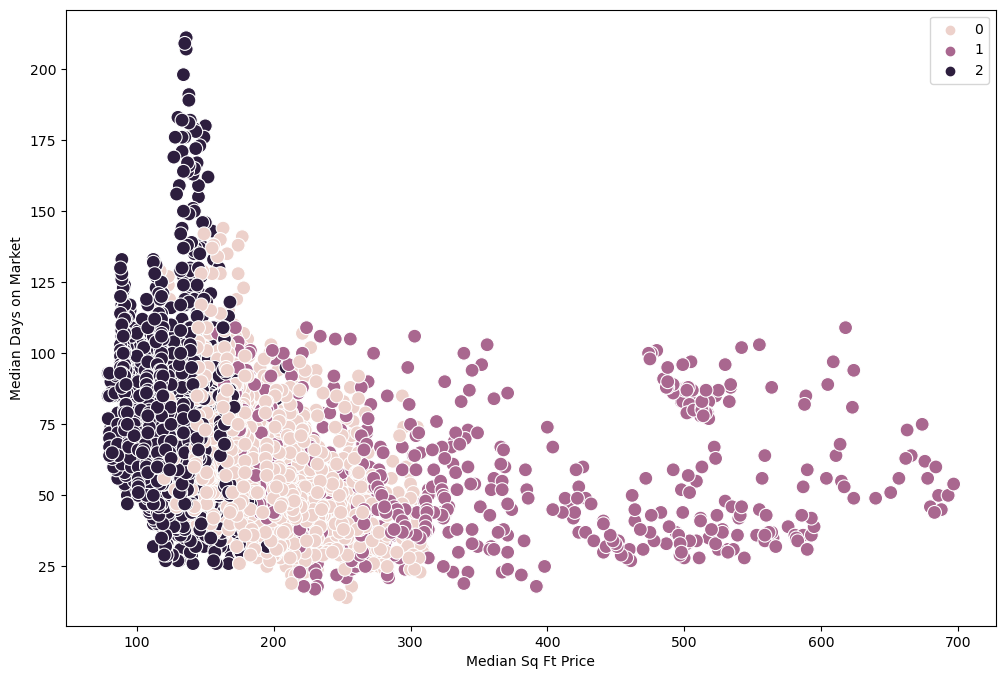

In [19]:
# Plotting the clusters for 'Median Sq Ft Price' and 'Median Days on Market':

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = core_met_NOstates['Median Sq Ft Price'], y = core_met_NOstates['Median Days on Market'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Median Sq Ft Price')
plt.ylabel('Median Days on Market')
plt.show

#### Comments:

Even though the clusters are somewhat intermingled, we can clearly see that cluster 0 (pink) covers the properties that are inexpensive, under 150 per square foot, but stay on the market from 25 to all the way to 200 days. This cluster has a wide range of being on the market with narrow price range.

Cluster 1 (purple) takes care of the properties that do not stay on the market longer that 110 days, but range from relatively inexpensive, aroung 150 per sf ft, to the most expensive properties reaching 700 per square foot. This cluster has a wide price range together with a narrower days on market range.

As for cluster 2 (dark purple) - it includes the properties that have shorter ranges both in terms of price and length of stay on the market.

______________________________________________

<function matplotlib.pyplot.show(close=None, block=None)>

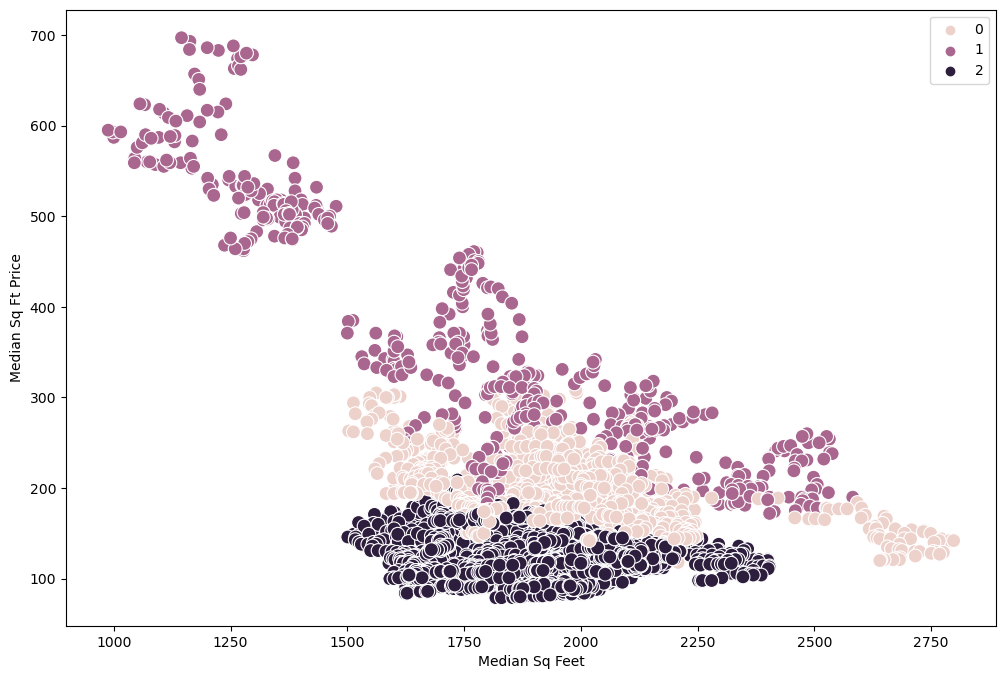

In [20]:
# Plotting the clusters for 'Median Sq Feet' and 'Median Sq Ft Price':

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = core_met_NOstates['Median Sq Feet'], y = core_met_NOstates['Median Sq Ft Price'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Median Sq Feet')
plt.ylabel('Median Sq Ft Price')
plt.show

#### Comments:

Cluster 0 (pink) - takes in the properties of the lowest price per square foot, that tend to be of medium size (from 1500 to 2400 square feet).

Cluster 2 (dark purple) encompasses the properties that are medium and large in size but still relatively inexpensive (150-300 per square foot).

Cluster 1 (purple) - includes the properties of all kinds of sizes, but the ones that are medium and high priced (from 190 to 700).

Looking at this scatterplot, one can see that four clusters would probably fit better in this case. The collection of purple dots in the top left corner of the plot are asking for their own claster.

___________________________________________

## 6. Calculating descriptive statistics on the clusters

In [21]:
# Relabeling the clusters from numbers to color names:

core_met_NOstates.loc[core_met_NOstates['Clusters'] == 0, 'Cluster'] = 'pink'
core_met_NOstates.loc[core_met_NOstates['Clusters'] == 1, 'Cluster'] = 'purple'
core_met_NOstates.loc[core_met_NOstates['Clusters'] == 2, 'Cluster'] = 'dark purple'

In [22]:
# Separating the data points in each cluster and running their descriptive statistics:

core_met_NOstates.groupby('Cluster').agg({'Median Listing Price':['mean', 'median'], 
                                 'Median Days on Market':['mean', 'median'],
                                 'No. Increased Price':['mean', 'median'],
                                 'No. Reduced Price':['mean', 'median'],
                                 'Median Sq Ft Price':['mean', 'median'],
                                 'Median Sq Feet':['mean', 'median'],
                                 'Avg Listing Price':['mean', 'median'],
                                 'No. Total Listings':['mean', 'median']})

Median Listing Price           Median Days on Market         \
                            mean    median                  mean median   
Cluster                                                                   
dark purple        242555.168330  239900.0             73.504121   71.0   
pink               384319.873311  369900.0             58.651182   55.0   
purple             578715.012963  580293.0             55.838889   51.0   

            No. Increased Price        No. Reduced Price          \
                           mean median              mean  median   
Cluster                                                            
dark purple          565.502820  240.0       4854.040781  2832.0   
pink                 797.440878  343.0       5445.243243  2792.0   
purple               914.600000  234.0       5935.162963  2013.0   

            Median Sq Ft Price        Median Sq Feet          \
                          mean median           mean  median   
Cluster                                                        
dark purple         125.924946  123.0    1914.193059  1920.0   
pink                196.775338  188.0    1987.629223  1980.0   
purple              356.596296  315.5    1775.424074  1800.0   

            Avg Listing Price            No. Total Listings           
                         mean     median               mean   median  
Cluster                                                               
dark purple      3.349818e+05   334444.0       25130.009544  17508.0  
pink             6.152027e+05   590137.0       28009.495777  17726.5  
purple           1.107404e+06  1050607.5       33948.150000  13923.0

#### Comments:

- The pink cluster (0) has considerably more days on the market in comparison with the other two clusters. It also has fewer properties the average price of which was increased or reduced.

- The purple cluster is much more expensive than the rest (judging by the Avg Listing Price and Median Sq Ft Price), with size of the properties being slightly smaller than in other clusters. It is also the most numerous.

_________________________________

#### What these results could be useful for:

- identifying the hot markets
- ranking the most and least affordable states

________________________________________

## 7. Copying 'Cluster' and 'Clusters' form 'core_met_NOstates' into 'core_met'

In [23]:
core_met_NOstates.head()

,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio,Clusters,Cluster
0,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613,1,purple
1,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875,2,dark purple
2,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387,2,dark purple
3,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575,2,dark purple
4,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576,2,dark purple


In [24]:
# Copy the clusters columns from 'core_met_NOstates' over to 'core_met' dataset:

core_met['Clusters'] = core_met_NOstates['Clusters']
core_met['Cluster'] = core_met_NOstates['Cluster']

In [25]:
core_met.head()

,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio,Clusters,Cluster
0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613,1,purple
1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875,2,dark purple
2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387,2,dark purple
3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575,2,dark purple
4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576,2,dark purple


## 8. Creating categories of 'Median Sq Ft'

In [26]:
# Creating categories of 'Median Sq Ft':

core_met.loc[core_met['Median Sq Feet'] < 1600, 'Footage category:'] = 'a) Small < 1600 sq.ft.'

core_met.loc[(core_met['Median Sq Feet'] >= 1600) & (core_met['Median Sq Feet'] < 2250), 'Footage category:'] = 'b) Medium'

core_met.loc[core_met['Median Sq Feet'] >= 2250, 'Footage category:'] = 'c) Large >= 2250 sq.ft.'

core_met['Footage category:'].value_counts(dropna = False)

b) Medium                  3567
a) Small < 1600 sq.ft.      237
c) Large >= 2250 sq.ft.     225
Name: Footage category:, dtype: int64

In [27]:
core_met.head()

,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio,Clusters,Cluster,Footage category:
0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613,1,purple,b) Medium
1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875,2,dark purple,b) Medium
2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387,2,dark purple,b) Medium
3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575,2,dark purple,b) Medium
4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576,2,dark purple,b) Medium


## 9. Creating 'Share Increased' column

In [28]:
core_met['Share Increased'] = core_met['No. Increased Price'] / core_met['No. Total Listings'] * 100

In [29]:
core_met.head()

,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio,Clusters,Cluster,Footage category:,Share Increased
0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613,1,purple,b) Medium,1.453537
1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875,2,dark purple,b) Medium,0.694444
2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387,2,dark purple,b) Medium,2.627966
3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575,2,dark purple,b) Medium,2.166065
4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576,2,dark purple,b) Medium,1.102181


## 10. Exporting 'Core_Metrics_Clean_Clusters'

In [30]:
# Exporting the dataset with clusters:

core_met.to_csv(os.path.join(path, 'Core_Metrics_Clean_Clusters.csv'))